In [202]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [203]:
#read in csv's and merge
values_df = pd.read_csv('/train_set_values.csv')
labels_df = pd.read_csv('/train_set_labels.csv')
test_df = pd.read_csv('/test_set_values.csv')

In [204]:
df= pd.merge(values_df, labels_df, on = 'id' )

df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [205]:
df.info() #to see the types of the columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [206]:
df.isna().sum() # to see the null values

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [207]:
df.drop(columns=['management_group','scheme_management','quantity_group','source_class','source_type','quality_group',
                'payment_type','extraction_type_class','extraction_type', 'waterpoint_type_group'],inplace=True )

In [208]:
df['decade'] = df['construction_year'] #creating new columns

In [209]:

# dividing the column decades

df['decade'].replace(to_replace = (1960,1961,1962,1963,1964,1965,1966,1967,1968,1969),
                        value ='60s' , inplace=True)
df['decade'].replace(to_replace = (1970,1971,1972,1973,1974,1975,1976,1977,1978,1979),
                        value ='70s' , inplace=True)
df['decade'].replace(to_replace = (1980,1981,1982,1983,1984,1985,1986,1987,1988,1989),
                        value ='80s' , inplace=True)
df['decade'].replace(to_replace = (1990,1991,1992,1993,1994,1995,1996,1997,1998,1999),
                        value ='90s' , inplace=True)
df['decade'].replace(to_replace = (2000,2001,2002,2003,2004,2005,2006,2007,2008,2009),
                        value ='00s' , inplace=True)
df['decade'].replace(to_replace = (2010,2011,2012,2013),
                        value ='10s' , inplace=True)

In [210]:
df['construction_year'].replace(to_replace = 0, value = 2000, inplace=True)
#changing the missing values in construction year column

In [211]:
df.drop(columns=['recorded_by'],inplace=True ) #dropping the column

In [ ]:
df['installer'].fillna(value='Unknown',inplace=True)  # filling null values with unknown

In [146]:
df['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [119]:
%pip install category-encoders
import pandas as pd
import numpy as np
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder
from category_encoders import LeaveOneOutEncoder

In [190]:
def DataCleaner(df, test_df):
    #Fills in the mod
    for col in df.columns[df.isna().sum() > 0]:
        mode = df[col].mode()[0]
        df[col].fillna(value = mode, inplace = True)
        
    #dropping    
    to_drop = ['funder', 'num_private', 'subvillage', 'region_code', 'recorded_by', 'source_type', 'waterpoint_type', 'scheme_name', 'payment_type', 'quantity_group']
    df.drop(columns = to_drop, inplace = True)
    #targets to 0,1,2
    df['status_group'] = df['status_group'].map({'functional': 2, 'functional needs repair': 1, 'non functional': 0})
    # df['public_meeting'] = df['public_meeting'].map({True: 1, False: 0})
    # df['permit'] = df['permit'].map({True: 1, False: 0})
    #date column
    df['date_recorded'] = pd.to_datetime(df['date_recorded'])
    df['year_recorded'] = df['date_recorded'].dt.year
    df['month_recorded'] = df['date_recorded'].dt.month
    df.drop(columns = 'date_recorded', inplace = True)

    #Test Set
    #TEST SET TRANSFORM

    #Fills in the mod
    for col in test_df.columns[test_df.isna().sum() > 0]:
        mode = test_df[col].mode()[0]
        test_df[col].fillna(value = mode, inplace = True)
        
    #dropping    
    to_drop = ['funder', 'num_private', 'subvillage', 'region_code', 'recorded_by', 'source_type', 'waterpoint_type', 'scheme_name', 'payment_type', 'quantity_group']
    test_df.drop(columns = to_drop, inplace = True)

    # test_df['public_meeting'] = test_df['public_meeting'].map({True: 1, False: 0})
    # test_df['permit'] = test_df['permit'].map({True: 1, False: 0})
    #date column
    test_df['date_recorded'] = pd.to_datetime(test_df['date_recorded'])
    test_df['year_recorded'] = test_df['date_recorded'].dt.year
    test_df['month_recorded'] = test_df['date_recorded'].dt.month
    test_df.drop(columns = 'date_recorded', inplace = True)


    #target encode
    target = 'status_group'
    lst_te = ['wpt_name', 'basin', 'region', 'district_code', 'lga', 'ward', 'scheme_management','installer','source']

    #encoder = TargetEncoder()
    encoder = LeaveOneOutEncoder()
    
    te_everything = ['wpt_name', 'basin', 'region', 'district_code', 'lga', 'ward', 'scheme_management','installer','source',
                    'extraction_type', 'extraction_type_group', 'extraction_type_class','management', 'payment', 'water_quality', 'management_group', 'quality_group', 
        'quantity','source_class', 'waterpoint_type_group'] 

    for c in te_everything:
        df[str(c) + '_encoded'] = encoder.fit_transform(df[c].values, df[target]) # TRAINING SET
        test_df[str(c) + '_encoded'] = encoder.transform(test_df[c].values) # TEST SET
        df.drop(columns=c, inplace=True) # TRAINING SET
        test_df.drop(columns=c, inplace=True) # TEST SET
        
    ohe = ['extraction_type', 'extraction_type_group', 'extraction_type_class','management', 'payment', 'water_quality', 'management_group', 'quality_group', 
        'quantity','source_class', 'waterpoint_type_group']


    return df, test_df

In [185]:
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import make_pipeline
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.classifier import StackingCVClassifier

In [191]:
train, test = DataCleaner(df, test_df)

In [192]:
train['status_group'].value_counts()

2    32259
0    22824
1     4317
Name: status_group, dtype: int64

In [193]:
train.columns

Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude', 'population',
       'public_meeting', 'permit', 'construction_year', 'status_group',
       'year_recorded', 'month_recorded', 'wpt_name_encoded', 'basin_encoded',
       'region_encoded', 'district_code_encoded', 'lga_encoded',
       'ward_encoded', 'scheme_management_encoded', 'installer_encoded',
       'source_encoded', 'extraction_type_encoded',
       'extraction_type_group_encoded', 'extraction_type_class_encoded',
       'management_encoded', 'payment_encoded', 'water_quality_encoded',
       'management_group_encoded', 'quality_group_encoded', 'quantity_encoded',
       'source_class_encoded', 'waterpoint_type_group_encoded'],
      dtype='object')

In [194]:
test.columns

Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude', 'population',
       'public_meeting', 'permit', 'construction_year', 'year_recorded',
       'month_recorded', 'wpt_name_encoded', 'basin_encoded', 'region_encoded',
       'district_code_encoded', 'lga_encoded', 'ward_encoded',
       'scheme_management_encoded', 'installer_encoded', 'source_encoded',
       'extraction_type_encoded', 'extraction_type_group_encoded',
       'extraction_type_class_encoded', 'management_encoded',
       'payment_encoded', 'water_quality_encoded', 'management_group_encoded',
       'quality_group_encoded', 'quantity_encoded', 'source_class_encoded',
       'waterpoint_type_group_encoded'],
      dtype='object')

In [195]:
y = train['status_group']
X = train.drop(columns = ['id','status_group'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [196]:
X_train.columns

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'population',
       'public_meeting', 'permit', 'construction_year', 'year_recorded',
       'month_recorded', 'wpt_name_encoded', 'basin_encoded', 'region_encoded',
       'district_code_encoded', 'lga_encoded', 'ward_encoded',
       'scheme_management_encoded', 'installer_encoded', 'source_encoded',
       'extraction_type_encoded', 'extraction_type_group_encoded',
       'extraction_type_class_encoded', 'management_encoded',
       'payment_encoded', 'water_quality_encoded', 'management_group_encoded',
       'quality_group_encoded', 'quantity_encoded', 'source_class_encoded',
       'waterpoint_type_group_encoded'],
      dtype='object')

In [86]:
smote = SMOTE(sampling_strategy = 'auto', n_jobs = -1)
X_resampled, y_resampled = smote.fit_sample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [97]:
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)

In [98]:
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)

In [88]:

smote_train = SMOTE(sampling_strategy = 'auto', n_jobs = -1)
X_train_resampled, y_train_resampled = smote_train.fit_sample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [201]:
X.head(20)

,amount_tsh,gps_height,longitude,latitude,population,public_meeting,permit,construction_year,year_recorded,month_recorded,wpt_name_encoded,basin_encoded,region_encoded,district_code_encoded,lga_encoded,ward_encoded,scheme_management_encoded,installer_encoded,source_encoded,extraction_type_encoded,extraction_type_group_encoded,extraction_type_class_encoded,management_encoded,payment_encoded,water_quality_encoded,management_group_encoded,quality_group_encoded,quantity_encoded,source_class_encoded,waterpoint_type_group_encoded
0,6000.0,1390,34.938093,-9.856322,109,True,False,1999,2011,3,1.497473,1.356412,1.587568,5,1.568384,1.228571,1.087339,1.279570,1.319506,1.299339,1.299339,1.299339,1.077347,1.572370,1.208690,1.150870,1.208690,1.376947,1.144476,1.236945
1,0.0,1399,34.698766,-2.147466,280,True,True,2010,2013,3,1.129071,1.091734,0.929878,2,1.220979,1.242857,1.223529,1.684211,1.344377,1.299339,1.299339,1.299339,1.297974,0.973015,1.208690,1.150870,1.208690,1.142253,1.208149,1.236945
2,25.0,686,37.460664,-3.821329,250,True,True,2009,2013,2,2.000000,1.255062,1.307206,4,1.175896,1.777778,1.087339,1.439803,0.806107,1.299339,1.299339,1.299339,1.077347,1.401046,1.208690,1.150870,1.208690,1.376947,1.208149,1.236945
3,0.0,263,38.486161,-11.155298,58,True,True,1986,2013,1,1.158838,0.816118,0.679005,63,0.535032,0.387097,1.087388,1.117647,1.023569,1.150325,1.118647,1.118647,1.077396,0.973093,1.208729,1.150908,1.208729,0.056205,1.144520,1.237003
4,0.0,0,31.130847,-1.825359,0,True,True,0,2011,7,1.064110,1.091734,1.133032,1,1.118182,1.666667,1.087339,1.149254,1.344377,1.299339,1.299339,1.299339,1.260973,0.973015,1.208690,1.178344,1.208690,1.250679,1.208149,1.236945
5,20.0,0,39.172796,-4.765587,1,True,True,2009,2011,3,1.158838,1.255062,1.155931,8,1.554007,1.666667,1.087339,1.183796,1.189573,1.149906,1.118323,1.118323,1.077347,1.401046,0.960453,1.150870,0.978629,1.376947,1.151625,1.236945
6,0.0,0,33.362410,-3.766365,0,True,True,0,2012,10,1.158838,1.223150,1.247340,3,1.149915,1.263889,1.087388,1.471204,1.023569,1.197056,1.197056,1.321483,1.077396,0.973093,1.208729,1.150908,1.208729,1.377008,1.144520,1.294619
7,0.0,0,32.620617,-4.226198,0,True,True,0,2012,10,2.000000,1.081636,1.247340,3,1.111377,0.814815,1.087388,1.183891,1.046484,1.408439,1.408439,1.321483,1.298281,0.918097,1.108344,1.150908,1.108344,1.377008,1.144520,1.294619
8,0.0,0,32.711100,-5.146712,0,True,True,0,2012,11,1.158838,1.081636,0.889173,6,0.701299,0.580645,1.087388,1.127660,1.023569,1.240100,1.240100,1.321483,1.077396,0.973093,0.960865,1.150908,0.979014,1.251173,1.144520,1.294619
9,0.0,0,30.626991,-1.257051,0,True,True,0,2011,8,1.158838,1.091734,1.133032,1,1.118182,1.340426,1.087339,1.149254,1.046365,1.408193,1.408193,1.321361,1.077347,0.973015,1.208690,1.150870,1.208690,1.376947,1.144476,1.294504


In [199]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
clf_xg = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1,
                            criterion= 'entropy',max_features= 'sqrt',
                             min_samples_split= 10,class_weight='balanced')
scores = cross_val_score(clf_xg, X_train, y_train, cv=5, scoring='accuracy')
print(scores.mean(), '+/-', scores.std())

0.9999326599326599 +/- 0.00013468013468012074


In [ ]:
clf_xg = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', nrounds = 'min.error.idx',
                      num_class = 3, maximize = False, eval_metric = 'auc', eta = .1,
                      max_depth = 6, colsample_bytree = .4, n_jobs = -1)
scores = cross_val_score(clf_xg, X_train, y_train, cv=5, scoring='accuracy')
print(scores.mean(), '+/-', scores.std())

In [163]:
clf_xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eta=0.1,
              eval_metric='merror', gamma=0, learning_rate=0.1,
              max_delta_step=0, max_depth=6, maximize=False, min_child_weight=1,
              missing=None, n_estimators=100, n_jobs=-1,
              nrounds='min.error.idx', nthread=None, num_class=3,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [164]:
preds_train_resampled = clf_xg.predict(X_train)
preds_train = clf_xg.predict(X)
preds_test = clf_xg.predict(X_test)

Accuracy Score:  1.0


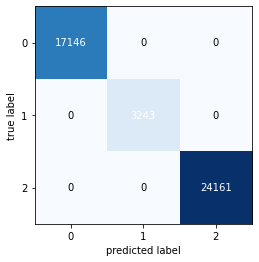

In [165]:
print("Accuracy Score: ", accuracy_score(y_train, preds_train_resampled))
cm = confusion_matrix(y_train, preds_train_resampled)
plot_confusion_matrix(cm)
plt.show()

Accuracy Score:  1.0


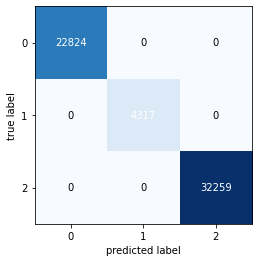

In [166]:
print("Accuracy Score: ", accuracy_score(y, preds_train))
cm = confusion_matrix(y, preds_train)
plot_confusion_matrix(cm)
plt.show()

Accuracy Score:  1.0


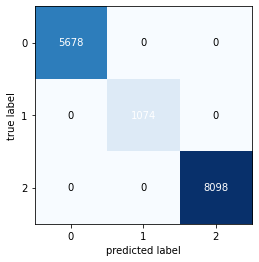

In [167]:
print("Accuracy Score: ", accuracy_score(y_test, preds_test))
cm = confusion_matrix(y_test, preds_test)
plot_confusion_matrix(cm)
plt.show()

In [168]:
preds_main_test = clf_xg.predict(test)
submission_preds = pd.Series(preds_main_test)

In [169]:
submission_preds.value_counts()

1    14839
0        7
2        4
dtype: int64

In [170]:
submission_preds_mapped = submission_preds.map({2: 'functional', 1: 'functional needs repair', 0: 'non functional'})
submission_preds_mapped.value_counts()

functional needs repair    14839
non functional                 7
functional                     4
dtype: int64

In [141]:
submit_df = pd.concat([test_df['id'], submission_preds_mapped], axis = 1)
submit_df.rename(columns = {0: 'status_group'}, inplace = True)
submit_df.head()

,id,status_group
0,50785,functional needs repair
1,51630,functional needs repair
2,17168,functional needs repair
3,45559,functional needs repair
4,49871,functional needs repair


In [142]:
submit_df.to_csv('submission.csv', index = False)